## Цель исследования

Цель проекта — проанализировать бизнес-модель маркетплейса MarketPro, оценить источники дохода и рассчитать показатели юнит-экономики для покупателей и продавцов.

В рамках анализа:
- рассчитываются показатели CAC, LTV, ROI;
- проводится предварительная оценка на основе предположений (assumptions);
- выполняется когортный анализ для расчёта фактического удержания;
- пересчитывается юнит-экономика на основе фактических данных;
- формулируются рекомендации по оптимизации бизнес-модели.

## Исходные данные и предположения

💡MarketPro - это маркетплейс, который специализируется на продаже различных товаров через веб-платформу.

Есть три основных источника дохода:

   1) комиссия с продавцов за каждую продажу

   2) плата за продвижение товаров на платформе

   3) абонентская плата за подписку на расширенные функции продавцов

Для предварительной оценки юнит-экономики используются следующие предположения:

- средний срок жизни покупателя — 24 месяца;
- средний срок жизни продавца — 18 месяцев;
- маркетинговый бюджет — 3 млн ₽ в месяц;
- операционные расходы — 1,5 млн ₽ в месяц;
- стоимость обслуживания одного продавца — 1 000 ₽ в месяц.

Данные предположения используются исключительно для первичной оценки и не отражают фактическое поведение пользователей.


##Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Загружаем файл с данными по продавцам (добавлено из loxQKonPVqDI для исправления NameError)
seller_data = pd.read_csv("/content/drive/MyDrive/Zerocode/М 09/seller_data - seller_data.csv")

# Удаляем первую строку-заголовок и преобразуем числовые столбцы
seller_data = seller_data.iloc[1:].copy()

seller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 1 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Seller_ID            999 non-null    object
 1   Order_Value          999 non-null    object
 2   Commission_Rate      999 non-null    object
 3   Promotion_Used       999 non-null    object
 4   Subscription         999 non-null    object
 5   Promotion_Income     999 non-null    object
 6   Subscription_Income  999 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
# Приведение данных в числовой тип float (числа с плавающей точкой).
seller_data["Order_Value"] = seller_data["Order_Value"].astype(float)
seller_data["Commission_Rate"] = seller_data["Commission_Rate"].astype(float)
seller_data["Promotion_Income"] = seller_data["Promotion_Income"].astype(float)
seller_data["Subscription_Income"] = seller_data["Subscription_Income"].astype(float)

seller_data.head()

,Seller_ID,Order_Value,Commission_Rate,Promotion_Used,Subscription,Promotion_Income,Subscription_Income
1,2,1930.867849,0.084183,TRUE,TRUE,5000.0,3000.0
2,3,2323.844269,0.105457,TRUE,FALSE,5000.0,0.0
3,4,2761.514928,0.108259,TRUE,FALSE,5000.0,0.0
4,5,1882.923313,0.081263,FALSE,FALSE,0.0,0.0
5,6,1882.931522,0.117448,FALSE,FALSE,0.0,0.0


##Расчёт ключевых показателей

💡 Важно различать:

Доход платформы MarketPro — это комиссии, продвижение и подписки, т.е. всё, что платят продавцы. Поэтому средний доход платформы с продавца: комиссия + доход от продвижения + доход от подписок.

In [ ]:
# Расчёт метрик
avg_order_value = seller_data["Order_Value"].mean()
avg_commission = (seller_data["Order_Value"] * seller_data["Commission_Rate"]).mean()
avg_platform_revenue_from_seller = (
    avg_commission + seller_data["Promotion_Income"].mean() + seller_data["Subscription_Income"].mean()
)
promotion_share = (seller_data["Promotion_Used"] == "TRUE").mean() * 100
subscription_share = (seller_data["Subscription"] == "TRUE").mean() * 100

# В процентах от среднего чека
commission_pct = avg_commission / avg_order_value * 100
promotion_pct = seller_data["Promotion_Income"].mean() / avg_order_value * 100
subscription_pct = seller_data["Subscription_Income"].mean() / avg_order_value * 100
platform_revenue_from_seller_pct = avg_platform_revenue_from_seller / avg_order_value * 100

results = {
    "Средний чек (₽)": round(avg_order_value, 2),
    "Средняя комиссия (₽)": round(avg_commission, 2),
    "Средний доход платформы от продавца (₽)": round(avg_platform_revenue_from_seller, 2),
    "Доля продавцов с продвижением (%)": round(promotion_share, 2),
    "Доля продавцов с подпиской (%)": round(subscription_share, 2),
    "Комиссия (% от чека)": round(commission_pct, 2),
    "Доход от продвижения (% от чека)": round(promotion_pct, 2),
    "Доход от подписки (% от чека)": round(subscription_pct, 2),
    "Общий доход платформы от продавца (% от чека)": round(platform_revenue_from_seller_pct, 2),
}

results

{'Средний чек (₽)': np.float64(2009.43),
 'Средняя комиссия (₽)': np.float64(201.4),
 'Средний доход платформы от продавца (₽)': np.float64(3336.54),
 'Доля продавцов с продвижением (%)': np.float64(50.75),
 'Доля продавцов с подпиской (%)': np.float64(19.92),
 'Комиссия (% от чека)': np.float64(10.02),
 'Доход от продвижения (% от чека)': np.float64(126.28),
 'Доход от подписки (% от чека)': np.float64(29.74),
 'Общий доход платформы от продавца (% от чека)': np.float64(166.04)}

Расчеты показывают, что средний доход платформы MarketPro от одного продавца составляет 3 336,54 ₽. Этот доход формируется из трех основных источников:

- Комиссия: в среднем составляет 201,40 ₽ с продажи (10,02% от среднего чека).
- Доход от продвижения: существенно превышает средний чек, составляя 126,28% от него, что говорит о высокой вовлеченности продавцов в платные рекламные услуги (50,75% продавцов используют продвижение).
- Доход от подписки: составляет 29,74% от среднего чека, при этом лишь 19,92% продавцов имеют платную подписку.

Общий доход платформы от продавца составляет 166,04% от среднего чека, что указывает на то, что модель монетизации с продавцов достаточно эффективна и не ограничивается только комиссией. Значительная часть дохода поступает от дополнительных услуг, таких как продвижение и подписки.

# Расчёт юнит-экономики

💡 Исходные данные по затратам:
   1) маркетинговые расходы на привлечение покупателей: 3 млн рублей в месяц
   2) средний объем привлекаемых покупателей: 2000 человек в месяц
   3) средний объем привлекаемых продавцов: 500 человек в месяц
   4) операционные расходы на поддержание платформы: 1,5 млн рублей в месяц
   5) расходы на обслуживание каждого продавца: 1000 рублей в месяц
   6) удержание продавцов: 40%
   7) удержание покупателей: 20%

Допустим, что маркетинговый бюджет (3 млн ₽) применяется и к продавцам, то есть используется для привлечения обеих сторон.

## Расчёт CAC (Customer Acquisition Cost)

CAC рассчитывается как отношение маркетинговых расходов к количеству привлечённых пользователей.

Поскольку платформа является двухсторонним маркетплейсом, CAC рассчитывается отдельно для покупателей и продавцов.


In [ ]:
marketing_cost_customers = 3_000_000  # руб/мес
new_customers_per_month = 2000
new_sellers_per_month = 500
# Расчёт CAC (Стоимость привлечения клиента)
CAC_customer = marketing_cost_customers / new_customers_per_month
CAC_seller_if_shared_marketing = marketing_cost_customers / new_sellers_per_month
print("--- Расчёт CAC (Стоимость привлечения клиента) ---")
print(f"CAC для покупателя: {CAC_customer:.2f} ₽")
print(f"CAC для продавца (при разделенном маркетинге): {CAC_seller_if_shared_marketing:.2f} ₽")

--- Расчёт CAC (Стоимость привлечения клиента) ---
CAC для покупателя: 1500.00 ₽
CAC для продавца (при разделенном маркетинге): 6000.00 ₽


В результате расчётов:
- CAC покупателя составляет 1 500 ₽;
- CAC продавца составляет 6 000 ₽.


## Расчёт ARPU и структуры доходов

Доход платформы формируется за счёт продавцов и включает:
- комиссию с продаж;
- платное продвижение товаров;
- подписку на расширенные функции.

ARPU продавца рассчитывается как ожидаемый среднемесячный доход платформы с одного продавца с учётом доли использования платных сервисов.


In [ ]:
# Предполагаемые средние месячные траты покупателя (из исходных данных)
avg_revenue_per_customer = 2000  # руб

# Расчеты дохода с продавца (повторяем для наглядности и независимости ячейки)
avg_order_value = seller_data["Order_Value"].mean()
avg_commission = (seller_data["Order_Value"] * seller_data["Commission_Rate"]).mean()
avg_promotion_income_per_seller = seller_data["Promotion_Income"].mean()
avg_subscription_income_per_seller = seller_data["Subscription_Income"].mean()

# Среднемесячный доход платформы с одного продавца (ARPU для продавцов)
avg_platform_revenue_per_seller_monthly = avg_commission + avg_promotion_income_per_seller + avg_subscription_income_per_seller

# Среднемесячный доход платформы с одного покупателя (ARPU для покупателей)
# Это средние траты покупателя * средний процент комиссии, который получает платформа.
platform_revenue_from_customer_monthly = avg_revenue_per_customer * (avg_commission / avg_order_value)

print("--- Расчет ARPU (средний доход с активного пользователя) ---")
print(f"ARPU для продавца (средний ежемесячный доход платформы с одного продавца): {avg_platform_revenue_per_seller_monthly:.2f} ₽")
print(f"ARPU для покупателя (средний ежемесячный доход платформы с одного покупателя): {platform_revenue_from_customer_monthly:.2f} ₽")

--- Расчет ARPU (средний доход с активного пользователя) ---
ARPU для продавца (средний ежемесячный доход платформы с одного продавца): 3336.54 ₽
ARPU для покупателя (средний ежемесячный доход платформы с одного покупателя): 200.46 ₽


Вклад платного продвижения отражает средний доход платформы от одного продавца, использующего продвижение, и учитывается в ARPU с учётом доли продавцов, подключивших данный сервис.


## Предварительный расчёт юнит-экономики (на основе предположений)

На данном этапе LTV и ROI рассчитываются на основе заданных предположений о сроке жизни пользователей.

Эти расчёты позволяют получить ориентировочную оценку юнит-экономики, однако требуют проверки через анализ фактического удержания пользователей.


In [ ]:
marketing_cost_customers = 3_000_000  # руб/мес
new_customers_per_month = 2000
new_sellers_per_month = 500
operational_costs = 1_500_000  # руб/мес
cost_per_seller_servicing = 1000  # руб/мес
seller_retention_months = 18
customer_retention_months = 24
avg_revenue_per_customer = 2000  # руб (средние месячные траты покупателя)

# Расчёты
# CAC_customer = marketing_cost_customers / new_customers_per_month  # Убрано по запросу пользователя
# CAC_seller_if_shared_marketing = marketing_cost_customers / new_sellers_per_month # Убрано по запросу пользователя

# Для корректного расчета LTV и ROI, CAC все еще нужен, поэтому пересчитаем его, но не выводим напрямую
CAC_customer = marketing_cost_customers / new_customers_per_month
CAC_seller_if_shared_marketing = marketing_cost_customers / new_sellers_per_month

avg_order_value = seller_data["Order_Value"].mean()
avg_commission = (seller_data["Order_Value"] * seller_data["Commission_Rate"]).mean()
avg_promotion_income_per_seller = seller_data["Promotion_Income"].mean()
avg_subscription_income_per_seller = seller_data["Subscription_Income"].mean()

# Пересчитываем ежемесячный доход платформы с одного продавца
avg_platform_revenue_per_seller_monthly = avg_commission + avg_promotion_income_per_seller + avg_subscription_income_per_seller

# Пересчитываем ежемесячный доход платформы с одного покупателя
# (средние траты покупателя * средний процент комиссии)
platform_revenue_from_customer_monthly = avg_revenue_per_customer * (avg_commission / avg_order_value)

# LTV и ROI на основе ИСХОДНЫХ предположений
# LTV покупателя теперь рассчитывается исходя из ежемесячного дохода платформы с покупателя
LTV_customer = platform_revenue_from_customer_monthly * customer_retention_months
LTV_seller = avg_platform_revenue_per_seller_monthly * seller_retention_months

ROI_customer = (LTV_customer - CAC_customer) / CAC_customer
ROI_seller_if_shared = (LTV_seller - CAC_seller_if_shared_marketing) / CAC_seller_if_shared_marketing

LTV_seller_net = (avg_platform_revenue_per_seller_monthly - cost_per_seller_servicing) * seller_retention_months
ROI_seller_if_shared_net = (LTV_seller_net - CAC_seller_if_shared_marketing) / CAC_seller_if_shared_marketing

results = {
    # "CAC_customer (руб)": round(CAC_customer, 2),
    # "CAC_seller_if_shared_marketing (руб)": round(CAC_seller_if_shared_marketing, 2),
    "Avg_order_value (руб)": round(avg_order_value, 2),
    "Avg_commission_per_sale (руб)": round(avg_commission, 2),
    "Avg_promotion_income_per_seller_monthly (руб)": round(avg_promotion_income_per_seller, 2),
    "Avg_subscription_income_per_seller_monthly (руб)": round(avg_subscription_income_per_seller, 2),
    "Avg_platform_revenue_per_seller_monthly (руб)": round(avg_platform_revenue_per_seller_monthly, 2),
    "Platform_revenue_from_customer_monthly (руб)": round(platform_revenue_from_customer_monthly, 2),
    "LTV_customer (rub, gross)": round(LTV_customer, 2),
    "LTV_seller (rub, gross)": round(LTV_seller, 2),
    "LTV_seller_net_after_servicing (rub)": round(LTV_seller_net, 2),
    "ROI_customer (x)": round(ROI_customer, 2),
    "ROI_customer (%)": round(ROI_customer * 100, 2),
    "ROI_seller_if_shared (x, gross)": round(ROI_seller_if_shared, 2),
    "ROI_seller_if_shared (%)": round(ROI_seller_if_shared * 100, 2),
    "ROI_seller_if_shared_net (x)": round(ROI_seller_if_shared_net, 2),
    "ROI_seller_if_shared_net (%)": round(ROI_seller_if_shared_net * 100, 2),
}

# print("CAC для покупателя (Customer Acquisition Cost):", results["CAC_customer (руб)"], "₽") # Убрано по запросу пользователя
# print("CAC для продавца (при разделенном маркетинге):", results["CAC_seller_if_shared_marketing (руб)"], "₽") # Убрано по запросу пользователя
# print("Ежемесячный доход платформы с покупателя (руб):", results["Platform_revenue_from_customer_monthly (руб)"], "₽") # Убрано по запросу пользователя
print("LTV покупателя (Customer Lifetime Value, валовый):", results["LTV_customer (rub, gross)"], "₽")
print("LTV продавца (Seller Lifetime Value, валовый):", results["LTV_seller (rub, gross)"], "₽")
print("LTV продавца (после учета затрат на обслуживание):", results["LTV_seller_net_after_servicing (rub)"], "₽")
print("ROI для покупателя (в виде множителя):", results["ROI_customer (x)"], "x")
print("ROI для покупателя (в процентах):", results["ROI_customer (%)"], "%")
print("ROI для продавца (при разделенном маркетинге, валовый):", results["ROI_seller_if_shared (x, gross)"], "x")
print("ROI для продавца (при разделенном маркетинге, валовый):", results["ROI_seller_if_shared (%)"], "%")
print("ROI для продавца (при разделенном маркетинге, чистый):", results["ROI_seller_if_shared_net (x)"], "x")
print("ROI для продавца (при разделенном маркетинге, чистый):", results["ROI_seller_if_shared_net (%)"], "%")

LTV покупателя (Customer Lifetime Value, валовый): 4810.94 ₽
LTV продавца (Seller Lifetime Value, валовый): 60057.65 ₽
LTV продавца (после учета затрат на обслуживание): 42057.65 ₽
ROI для покупателя (в виде множителя): 2.21 x
ROI для покупателя (в процентах): 220.73 %
ROI для продавца (при разделенном маркетинге, валовый): 9.01 x
ROI для продавца (при разделенном маркетинге, валовый): 900.96 %
ROI для продавца (при разделенном маркетинге, чистый): 6.01 x
ROI для продавца (при разделенном маркетинге, чистый): 600.96 %


На основе предположений:
- обе стороны платформы демонстрируют положительный ROI;
- продавцы существенно превосходят покупателей по LTV и рентабельности.

Далее проводится когортный анализ для проверки корректности данных выводов.


## Когортный анализ удержания пользователей

Для оценки фактического поведения пользователей проводится когортный анализ удержания покупателей и продавцов.

Анализ позволяет:
- определить фактический срок жизни пользователей;
- выявить ранний отток;
- пересчитать показатели LTV и ROI на основе реальных данных.


Customers columns: ['user_id', 'registration_date', 'activity_1_month', 'activity_3_month', 'activity_6_month', 'activity_12_month']
   user_id registration_date  activity_1_month  activity_3_month  \
0        1        2021-06-09                 0                 1   
1        2        2021-08-09                 0                 0   
2        3        2021-07-12                 0                 0   

   activity_6_month  activity_12_month  
0                 0                  0  
1                 0                  0  
2                 0                  0  

Sellers columns: ['seller_id', 'registration_date', 'activity_1_month', 'activity_3_month', 'activity_6_month', 'activity_12_month']
   seller_id registration_date  activity_1_month  activity_3_month  \
0          1        2021-03-23                 1                 0   
1          2        2022-11-30                 0                 0   
2          3        2021-11-17                 0                 1   

   activity_6_m

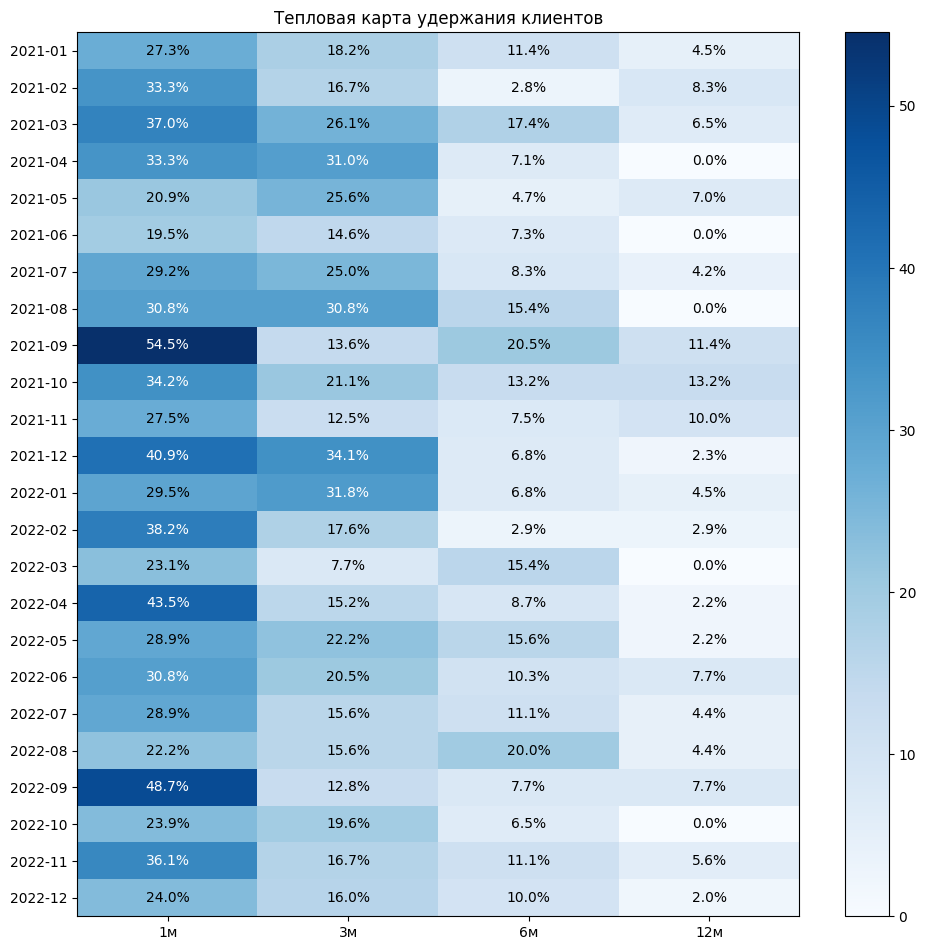

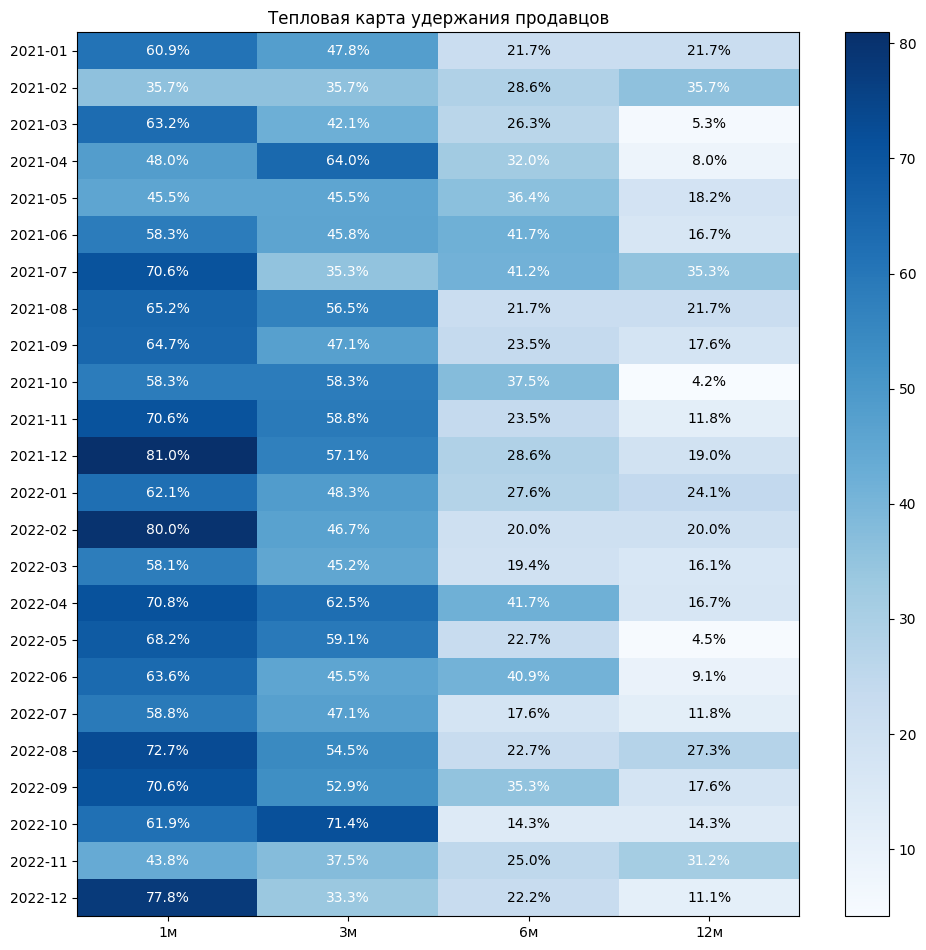

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
import os

# Загрузка файлов по когортам
cust = pd.read_csv('/content/drive/MyDrive/Zerocode/М 09/cohort_analysis_data - cohort_analysis_data.csv', header=0)
sellers = pd.read_csv('/content/drive/MyDrive/Zerocode/М 09/sellers_cohort_analysis_data - sellers_cohort_analysis_data.csv', header=0)

print("Customers columns:", cust.columns.tolist())
print(cust.head(3))
print("\nSellers columns:", sellers.columns.tolist())
print(sellers.head(3))

def prepare_cohort_df(df, date_col_name='Дата регистрации'):
    possible_names = {
        1: ['1', '1_month', 'M1', 'm1', '1 месяц', '1_months', 'month_1', '1m', 'M01', '1_mes', '1м'],
        3: ['3', '3_month', 'M3', 'm3', '3 месяца', '3_months', 'month_3', '3m', 'M03', '3_mes', '3м'],
        6: ['6', '6_month', 'M6', 'm6', '6 месяцев', '6_months', 'month_6', '6m', 'M06', '6_mes', '6м'],
        12: ['12', '12_month', 'M12', 'm12', '12 месяцев', '12_months', 'month_12', '12m', 'M12', '12_mes', '12м']
    }
    cols = {}
    for k, opts in possible_names.items():
        for o in opts:
            if o in df.columns:
                cols[k] = o
                break
    # fallback search by ending
    if len(cols) < 4:
        for k in [1,3,6,12]:
            if k in cols: continue
            for c in df.columns:
                if str(c).strip().endswith(str(k)):
                    cols[k] = c
                    break
    # try substring
    if len(cols) < 4:
        for k in [1,3,6,12]:
            if k in cols: continue
            for c in df.columns:
                if f"{k}" in str(c):
                    cols[k] = c
                    break
    missing = [k for k in [1,3,6,12] if k not in cols]
    if missing:
        raise ValueError(f"Не удалось найти колонки для периодов: {missing}. Найденные: {cols}")

    for k, col in cols.items():
        ser = df[col].astype(str).str.strip().str.upper()
        ser = ser.replace({'TRUE':'1','FALSE':'0','YES':'1','NO':'0','Y':'1','N':'0'})
        ser = ser.replace({'1.0':'1','0.0':'0'})
        try:
            num = pd.to_numeric(ser, errors='coerce')
            ser = num.fillna(0).astype(int)
        except:
            ser = ser.map(lambda x: 1 if str(x) in ['1','1.0'] else 0)
        df[f'active_{k}'] = ser.astype(int)

    # date column detection
    if date_col_name not in df.columns:
        candidates = [c for c in df.columns if 'регистр' in str(c).lower() or 'registration' in str(c).lower()]
        if not candidates:
            raise ValueError("Не найдена колонка с датой регистрации")
        date_col = candidates[0]
    else:
        date_col = date_col_name

    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[date_col]).copy()
    df['cohort'] = df[date_col].dt.to_period('M').astype(str)
    return df, cols

def cohort_table_and_heatmap(df, title='Cohort analysis'):
    cohorts = df.groupby('cohort').size().rename('cohort_size').reset_index()
    retention = []
    for cohort_name, size in zip(cohorts['cohort'], cohorts['cohort_size']):
        sub = df[df['cohort']==cohort_name]
        row = {'cohort': cohort_name, 'cohort_size': int(size)}
        for k in [1,3,6,12]:
            row[f'M{k}'] = sub[f'active_{k}'].sum() / size * 100
        retention.append(row)
    retention_df = pd.DataFrame(retention).sort_values('cohort', ascending=False).set_index('cohort') # Added ascending=False
    mean_retention = retention_df[['M1','M3','M6','M12']].mean().to_dict()

    agg = {}
    total = len(df)
    for k in [1,3,6,12]:
        agg[f'M{k}'] = df[f'active_{k}'].sum() / total

    xs = np.array([1,3,6,12])
    ys = np.array([agg['M1'], agg['M3'], agg['M6'], agg['M12']])
    mask = ys > 0
    if mask.sum() >= 2:
        coeff = np.polyfit(xs[mask], np.log(ys[mask]), 1)
        slope = coeff[0]
        r = np.exp(slope)
        if r >= 1:
            lifetime = np.nan
        else:
            lifetime = 1 / (1 - r)
    else:
        r = np.nan
        lifetime = np.nan

    heat = retention_df[['M1','M3','M6','M12']].copy()
    fig, ax = plt.subplots(figsize=(10, max(6, 0.4*len(heat)))) # Adjusted figure size
    im = ax.imshow(heat.values, aspect='auto', origin='lower', cmap='Blues') # Changed colormap to 'Blues'
    ax.set_yticks(np.arange(len(heat.index)))
    ax.set_yticklabels(heat.index)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(['1м','3м','6м','12м']) # Translated x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    ax.set_title(title) # Title will be set in the function call
    for i in range(len(heat.index)):
        for j in range(4):
            text = f"{heat.values[i,j]:.1f}%"
            color = "white" if heat.values[i,j] > 30 else "black" # Set text color based on value
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=10)
    plt.colorbar(im, ax=ax)
    plt.tight_layout()

    return retention_df, mean_retention, r, lifetime, fig

# Customers
cust_df, cust_cols = prepare_cohort_df(cust, date_col_name='Дата регистрации')
cust_ret_table, cust_mean_ret, cust_r, cust_lifetime, cust_fig = cohort_table_and_heatmap(cust_df, title='Тепловая карта удержания клиентов') # Translated title

# Sellers
sell_df, sell_cols = prepare_cohort_df(sellers, date_col_name='Дата регистрации')
sell_ret_table, sell_mean_ret, sell_r, sell_lifetime, sell_fig = cohort_table_and_heatmap(sell_df, title='Тепловая карта удержания продавцов') # Translated title

print("Customers cohort retention ( % ):")
print(cust_ret_table.reset_index())
print("\nSellers cohort retention ( % ):")
print(sell_ret_table.reset_index())

print("Average customer retention (percent):")

**Удержание покупателей**

Низкое удержание:

- Среднее удержание покупателей очень низкое. К 1-му месяцу оно падает примерно до 32%, к 3-му месяцу — до 20%, а к 12-му месяцу — всего до 4,6%.

- Быстрый отток: Основной отток покупателей происходит в первые месяцы после регистрации.

**Удержание продавцов**

Удержание выше, чем у покупателей:
- Удержание продавцов значительно выше по сравнению с покупателями. Среднее удержание составляет около 63% к 1-му месяцу, 50% к 3-му месяцу и 17,5% к 12-му месяцу.
- Постепенный отток: Отток продавцов более постепенный, чем у покупателей, что говорит о большей лояльности или сложности смены платформы.



## Фактический срок жизни пользователей (Lifetime)

На основе когортного анализа получены следующие оценки среднего срока жизни:

- покупатели — около 6,25 месяца;
- продавцы — около 8,76 месяца.

Эти значения используются для финального пересчёта LTV и ROI.


## Пересчёт юнит-экономики на основе фактических данных

Используя фактический Lifetime, выполняется пересчёт LTV и ROI для покупателей и продавцов.

Данный расчёт отражает реальную экономику платформы и используется для формирования итоговых выводов и рекомендаций.


In [ ]:
# LTV на основе ФАКТИЧЕСКИХ данных когортного анализа
# LTV покупателя теперь рассчитывается исходя из ежемесячного дохода платформы с покупателя
LTV_customer_actual = platform_revenue_from_customer_monthly * cust_lifetime
LTV_seller_actual = avg_platform_revenue_per_seller_monthly * sell_lifetime
LTV_seller_net_actual = (avg_platform_revenue_per_seller_monthly - cost_per_seller_servicing) * sell_lifetime

# ROI на основе ФАКТИЧЕСКИХ данных когортного анализа
ROI_customer_actual = (LTV_customer_actual - CAC_customer) / CAC_customer
ROI_seller_if_shared_actual = (LTV_seller_actual - CAC_seller_if_shared_marketing) / CAC_seller_if_shared_marketing
ROI_seller_if_shared_net_actual = (LTV_seller_net_actual - CAC_seller_if_shared_marketing) / CAC_seller_if_shared_marketing

print("--- Показатели на основе ФАКТИЧЕСКИХ ДАННЫХ КОГОРТНОГО АНАЛИЗА ---")
print("Фактический LTV покупателя (Customer Lifetime Value, валовый):", round(LTV_customer_actual, 2), "₽")
print("Фактический LTV продавца (Seller Lifetime Value, валовый):", round(LTV_seller_actual, 2), "₽")
print("Фактический LTV продавца (после учета затрат на обслуживание):", round(LTV_seller_net_actual, 2), "₽")
print("Фактический ROI для покупателя (в виде множителя):", round(ROI_customer_actual, 2), "x")
print("Фактический ROI для покупателя (в процентах):", round(ROI_customer_actual * 100, 2), "%")
print("Фактический ROI для продавца (при разделенном маркетинге, валовый):", round(ROI_seller_if_shared_actual, 2), "x")
print("Фактический ROI для продавца (при разделенном маркетинге, валовый):", round(ROI_seller_if_shared_actual * 100, 2), "%")
print("Фактический ROI для продавца (при разделенном маркетинге, чистый):", round(ROI_seller_if_shared_net_actual, 2), "x")
print("Фактический ROI для продавца (при разделенном маркетинге, чистый):", round(ROI_seller_if_shared_net_actual * 100, 2), "%")

--- Показатели на основе ФАКТИЧЕСКИХ ДАННЫХ КОГОРТНОГО АНАЛИЗА ---
Фактический LTV покупателя (Customer Lifetime Value, валовый): 1254.03 ₽
Фактический LTV продавца (Seller Lifetime Value, валовый): 29259.67 ₽
Фактический LTV продавца (после учета затрат на обслуживание): 20490.2 ₽
Фактический ROI для покупателя (в виде множителя): -0.16 x
Фактический ROI для покупателя (в процентах): -16.4 %
Фактический ROI для продавца (при разделенном маркетинге, валовый): 3.88 x
Фактический ROI для продавца (при разделенном маркетинге, валовый): 387.66 %
Фактический ROI для продавца (при разделенном маркетинге, чистый): 2.42 x
Фактический ROI для продавца (при разделенном маркетинге, чистый): 241.5 %


***Выводы:***

*Критическая ситуация с покупателями:*

 - После всех корректировок и учета фактического удержания, MarketPro теряет деньги на привлечении каждого покупателя (ROI = -16,40%). Маркетинговые инвестиции в привлечение покупателей не окупаются из-за крайне низкого удержания.

*Серьезные проблемы с удержанием:*

 - Обе категории пользователей (покупатели и продавцы) имеют значительно более низкие показатели удержания и, соответственно, меньший фактический LTV, чем предполагалось. Для покупателей это особенно остро, поскольку их фактический LTV в 6,25 месяца крайне мал.

 - Продавцы прибыльны, но менее эффективно: Привлечение продавцов остаётся прибыльным, но фактический ROI (3,88x валовый, 2,42x чистый) существенно ниже оптимистичных прогнозов.

MarketPro сталкивается с серьезной проблемой неэффективности привлечения покупателей. Без кардинального улучшения удержания покупателей, долгосрочная прибыльность и устойчивость бизнес-модели находятся под большим вопросом, несмотря на положительные, хотя и заниженные, показатели по продавцам.



## Итоговые выводы

Анализ показал, что:
- предварительные расчёты на основе предположений существенно переоценивают LTV покупателей;
- ключевым фактором является низкое удержание покупателей в первые месяцы;
- продавцы остаются основным источником прибыли платформы.

Основная зона роста MarketPro — управление жизненным циклом пользователей, повышение удержания и развитие высокомаржинальных источников дохода, а не масштабирование привлечения.


## Рекомендации

На основе анализа предлагается:
- оптимизировать CAC и повысить удержание покупателей в первые 1–3 месяца;
- развивать подписку и платные инструменты для продавцов;
- регулярно пересчитывать LTV и ROI на основе когортных данных;
- использовать когортный анализ как основной инструмент оценки эффективности роста.


## Подход к оптимизации

Оптимизация юнит-экономики основана на фактических данных когортного анализа.

Ключевые принципы:
- не масштабировать привлечение при отрицательном ROI;
- фокус на росте LTV через удержание и монетизацию;
- снижение CAC за счёт качества привлечения, а не объёма.

Меры оптимизации разделены для покупателей и продавцов.


## Оптимизация покупателей

Фактическая юнит-экономика покупателей является убыточной из-за низкого удержания.

Основной фокус оптимизации — снижение CAC и рост LTV за счёт увеличения Lifetime и ARPU.


### Снижение CAC покупателей

- анализ CAC по каналам и когортам;
- отключение каналов с низким 1–3-месячным удержанием;
- оптимизация маркетинга под первую и повторную покупку;
- рост органического и реферального трафика.


### Рост LTV покупателей

- улучшение onboarding и первого опыта;
- персонализированные рекомендации;
- стимулы для повторных покупок;
- программы лояльности.

Фокус — увеличение Lifetime и среднего дохода.


## Оптимизация продавцов

Продавцы остаются основным источником прибыли платформы.

Цель оптимизации — продлить Lifetime продавцов и увеличить их вклад в выручку.


### Рост Lifetime продавцов

- усиленный onboarding и помощь в первых продажах;
- аналитические рекомендации для активных продавцов;
- поддержка на этапе масштабирования.


### Рост ARPU и контроль затрат

- развитие подписки и платного продвижения;
- пакетные предложения;
- фокус на каналы с высоким удержанием;
- автоматизация поддержки и self-service.


## Ожидаемый эффект

- снижение CAC покупателей на 10–15%;
- рост Lifetime покупателей и выход ROI в положительную зону;
- рост Lifetime продавцов до 11–12 месяцев;
- увеличение LTV продавцов на 30–40%.
